## Часть 4: Знакомство с pandas.

Автор: Потанин Марк, mark.potanin@phystech.edu

Pandas — это библиотека Python, предоставляющая широкие возможности для анализа данных. Данные, с которыми работают датасаентисты, часто хранятся в форме табличек — например, в форматах .csv, .tsv или .xlsx. С помощью библиотеки Pandas такие табличные данные очень удобно загружать, обрабатывать и анализировать. А в связке с библиотеками Matplotlib и Seaborn Pandas предоставляет широкие возможности визуального анализа табличных данных. Аналитик на Python использует ее в своей работе практически каждый день.

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй – это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала импортируем библиотеку в наще окружение с помощью `import pandas as pd`, а так же импортируем библиотеку `numpy`.

In [ ]:
%pip install pandas

In [174]:
import pandas as pd
import numpy as np

#### Объект Series библиотеки Pandas.

Объект `Series` - одномерный массив индексированных данных. Это такая колонка с данными, как в `Excel`. Слева у нас стоят индексы элементов, а справа - соответствующие значения.

Все способы создания объектов `Series` представляют собой различные варианты следующего синтаксиса: `pd.Series(data, index=index)`, где `index` - необязательный аргумент, а `data` может быть одной из множества сущностей.

In [177]:
s = pd.Series([1,3,5,4,6,8])
s

0    1
1    3
2    5
3    4
4    6
5    8
dtype: int64

Для того, чтобы получить доступ к индексам и значениям нашего объекта, помогут методы `index` и `values`.

In [178]:
print(s.index) # массивоподобный объект типа pd.Index
print(s.values) # массив значений объекта Series

RangeIndex(start=0, stop=6, step=1)
[1 3 5 4 6 8]


In [179]:
s.values

array([1, 3, 5, 4, 6, 8])

Как и при работе с массивами, можно делать срезы нашей колонки.

In [180]:
s[1:3]

1    3
2    5
dtype: int64

Основное отличие от массива NumPy в том, что индекс объекта Series библиотеки Pandas описывается явно и связывается со значением.


In [181]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Доступ к элементам осуществляется по индексу.

In [183]:
data['b']

np.float64(0.5)

Можно применять даже индексы, состоящие из несмежных или непоследовательных значений.

In [184]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

Объект Series можно создать из обычного питоновского словаря.

In [185]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [186]:
population['California']

np.int64(38332521)

In [187]:
population['California': 'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

Функция `pd.date_range()` позволяет создать список дат нужной длины и с нужным шагом. 

In [189]:
dates = pd.date_range(start='2021-03-01', end = '2021-03-06')
dates

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06'],
              dtype='datetime64[ns]', freq='D')

In [190]:
dates = pd.date_range(start='2021-03-01', periods=100)
dates

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
               '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05',
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
      

In [191]:
dates = pd.date_range(start='2021-03-01', periods=6,freq='Y')
dates

/var/folders/w6/5q18n8_j5pd3kvgw25svnzb80000gp/T/ipykernel_97570/223523834.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(start='2021-03-01', periods=6,freq='Y')


DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31',
               '2025-12-31', '2026-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [192]:
dates = pd.date_range(start='2021-03-01', periods=6,freq='Y')
dates

/var/folders/w6/5q18n8_j5pd3kvgw25svnzb80000gp/T/ipykernel_97570/223523834.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(start='2021-03-01', periods=6,freq='Y')


DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31',
               '2025-12-31', '2026-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

Этот спсиок можно передать в качестве индекса в создаваемый объект `Series`. Создадим временную колонку, пусть, например, это будет число приянятых на работу сотрудников в каждый месяц 20-го года.

In [193]:
dates = pd.date_range(start='2020-01', periods=12,freq='M')
pd.Series(range(12),index=dates)

/var/folders/w6/5q18n8_j5pd3kvgw25svnzb80000gp/T/ipykernel_97570/3879844494.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01', periods=12,freq='M')


2020-01-31     0
2020-02-29     1
2020-03-31     2
2020-04-30     3
2020-05-31     4
2020-06-30     5
2020-07-31     6
2020-08-31     7
2020-09-30     8
2020-10-31     9
2020-11-30    10
2020-12-31    11
Freq: ME, dtype: int64

#### Объект DataFrame библиотеки Pandas.

Если объект `Series` - аналог одномерного массива с гибкими индексами, объект `DataFrame` - аналог двумерного массива с гибкими индексами строк и гибкими именами столбцов. 

Второй – это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа.  Структура `DataFrame` отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.



In [194]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [195]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Аналогично `Series` объект `DataFrame` имеет метод `index`, обеспечивающий доступ к меткам индекса. Так же есть метод `columns`, представляющий собой содержащий метки столбцов.

In [197]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [198]:
states.columns

Index(['population', 'area'], dtype='object')

In [200]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]])

Таким образом  `DataFrame` можно рассматривать как обобщение двумерного массива NumPy, где как у строк, так и у столбцов есть индексы для доступа к данным.

`DataFrame` можно создать из одного объекта `Series`.

In [204]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


Можно создать из списка словарей.

In [205]:
data = [{'a': i, 'b': i * 2} for i in range(5)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


Даже если некоторые ключи в словаре отсутствуют, библиотека Pandas просто заполнит из занчениями `NaN` (то есть Not a number - "не является числом").

In [206]:
pd.DataFrame([{'a':1, 'b': 2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


Из словаря объектов `Series`.

In [207]:
pd.DataFrame({'population': population, 'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Из массива NumPy.

In [209]:
dates = pd.date_range(start='2021-03-01', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=['one','two','three','four'])
df

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


In [210]:
import pandas as pd
import numpy as np

In [212]:
df2 = pd.DataFrame({ 'A' : 1.,                   'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                   'F' : 'foo' })

df2

,A,B,C,D,F
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


Посмотреть типы каждой колонки поможет метод `dtypes`.

In [215]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
F           object
dtype: object

In [216]:
df

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


#### Получение данных из таблицы.

In [220]:
df['one one']

2021-03-01   -0.343359
2021-03-02   -0.344823
2021-03-03    0.258004
2021-03-04    1.302554
2021-03-05    0.682445
2021-03-06    0.362713
Freq: D, Name: one, dtype: float64

In [218]:
df.one

2021-03-01   -0.343359
2021-03-02   -0.344823
2021-03-03    0.258004
2021-03-04    1.302554
2021-03-05    0.682445
2021-03-06    0.362713
Freq: D, Name: one, dtype: float64

In [221]:
df[0:3]

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641


In [222]:
df['2021-03-01':'2021-03-03']

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641


Существуют специальные методы для индексации (индексаторы): `loc` и `iloc`.

`loc` позволяет выполнить индексацию и срезы с использованием явного индекса:

In [223]:
df.loc['2021-03-01']

one     -0.343359
two     -0.491001
three   -0.206576
four     1.185262
Name: 2021-03-01 00:00:00, dtype: float64

Так же индексирование по столбцам.

In [224]:
df

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


In [228]:
df.loc['2021-03-01','one']

np.float64(-0.34335861932246325)

По столбцам и строкам.

In [230]:
df.loc['2021-03-01':'2021-03-03',['one','two']]

,one,two
2021-03-01,-0.343359,-0.491001
2021-03-02,-0.344823,0.432680
2021-03-03,0.258004,1.657449


In [231]:
df.loc['20210301',['one','two']]

one   -0.343359
two   -0.491001
Name: 2021-03-01 00:00:00, dtype: float64

Чтобы получить одно значение (один элемент матрицы).

In [232]:
df.loc['20210301','one']

np.float64(-0.34335861932246325)

Атрибут `iloc` дает возможность выполнить индексацию и срезы, применяя неявный индекс (порядковый номер) - как для столбцов, так и для строк.

In [233]:
df

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


In [235]:
df.iloc[3,2]

np.float64(0.25000781422108137)

In [236]:
df.iloc[[1,2,4],[0,2]]

,one,three
2021-03-02,-0.344823,-0.152112
2021-03-03,0.258004,-1.267162
2021-03-05,0.682445,-1.298674


In [237]:
df.iloc[1:3,:]

,one,two,three,four
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641


In [238]:
df.iloc[:,1:3]

,two,three
2021-03-01,-0.491001,-0.206576
2021-03-02,0.432680,-0.152112
2021-03-03,1.657449,-1.267162
2021-03-04,-0.001947,0.250008
2021-03-05,0.573239,-1.298674
2021-03-06,1.654088,-0.523584


In [239]:
df.iloc[1,1]

np.float64(0.4326797026238973)

#### Срезы по значениям.

Pandas позволяет проводить филтрацию по какому-нибудь условию. Выходом будет часть таблицы и колонки, которая удовлетворяет заданному условию. Такая процедура называется **маскированием**.

In [240]:
one_column = df['two']

In [241]:
one_column

2021-03-01   -0.491001
2021-03-02    0.432680
2021-03-03    1.657449
2021-03-04   -0.001947
2021-03-05    0.573239
2021-03-06    1.654088
Freq: D, Name: two, dtype: float64

In [243]:
one_column>0.5

2021-03-01    False
2021-03-02    False
2021-03-03     True
2021-03-04    False
2021-03-05     True
2021-03-06     True
Freq: D, Name: two, dtype: bool

In [244]:
one_column[one_column>0.5]

2021-03-03    1.657449
2021-03-05    0.573239
2021-03-06    1.654088
Name: two, dtype: float64

In [245]:
df[df.one > 0.0]

,one,two,three,four
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


Можно использовать несколько условий.

In [246]:
df[(df.one > 0.0)&(df.two>0.0)]

,one,two,three,four
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


В индексаторе `loc` можно сочетать маскирование и выбор необходимых столбцов.

In [247]:
df.loc[(df.one > 0.7)&(df.two>0.5),['three','four']]

,three,four


In [248]:
df2 = df.copy()
df2['five'] = ['one', 'one','two','three','four','three']
df2

,one,two,three,four,five
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262,one
2021-03-02,-0.344823,0.432680,-0.152112,1.323913,one
2021-03-03,0.258004,1.657449,-1.267162,-0.697641,two
2021-03-04,1.302554,-0.001947,0.250008,1.426281,three
2021-03-05,0.682445,0.573239,-1.298674,-1.085781,four
2021-03-06,0.362713,1.654088,-0.523584,-0.502067,three


Для проверки того, что значения столбца находятся в определенном массиве данных используется маскирование с методом `isin`.

In [249]:
df2[df2['five'].isin(['two','four'])]

,one,two,three,four,five
2021-03-03,0.258004,1.657449,-1.267162,-0.697641,two
2021-03-05,0.682445,0.573239,-1.298674,-1.085781,four


#### Как быстро посмотреть на данные, с которым мы имеем дело.

Посмотреть на верхние и нижние строки таблицы помогут методы `head` и `tail` соответственно. По умолчанию количество отображаемых элементов равно пяти, но вы можете передать собственное число.

In [250]:
df

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


In [252]:
df.head(3)

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641


Посмотреть на последние 3 строки.

In [253]:
df.tail(3)

,one,two,three,four
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


In [254]:
df.index

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06'],
              dtype='datetime64[ns]', freq='D')

In [255]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

Получить все элементы таблицы в виде двумерного массива NumPy поможет метод `values`.

In [257]:
df.values

array([[-0.34335862, -0.49100137, -0.20657615,  1.1852615 ],
       [-0.34482334,  0.4326797 , -0.15211232,  1.32391339],
       [ 0.25800358,  1.65744855, -1.26716165, -0.69764091],
       [ 1.30255399, -0.00194663,  0.25000781,  1.42628056],
       [ 0.68244504,  0.57323879, -1.29867402, -1.08578058],
       [ 0.3627135 ,  1.65408817, -0.52358416, -0.50206689]])

Метод `describe()` показывает краткую статистическую сводку ваших данных. Он выводит следующие статистики `count` - количество объектов в столбце (просто некоторые значения помогут быть пропущены),  `mean` - среднее по столбцу, `std` - стандартное отклонение по столбцу, `min` и `max` - минимальное и максимальное значения соответственно. `25%`, `50%`, `75%` - значения разных перцентилей. Выходом метода `describe()` является новая таблица со стоатистиками.

In [259]:
df

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


In [261]:
df.describe()

,one,two,three,four
count,6.000000,6.000000,6.000000,6.000000
mean,0.319589,0.637418,-0.533017,0.274995
std,0.629997,0.872036,0.630883,1.153762
min,-0.344823,-0.491001,-1.298674,-1.085781
25%,-0.193018,0.106710,-1.081267,-0.648747
50%,0.310359,0.502959,-0.365080,0.341597
75%,0.602512,1.383876,-0.165728,1.289250
max,1.302554,1.657449,0.250008,1.426281


Транспонирование данных происходит с помощью метода `T`. Транспонирование - переворот таблички, то есть строки становятся столбцами, а столбцы - строками.

In [262]:
df.T

,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06
one,-0.343359,-0.344823,0.258004,1.302554,0.682445,0.362713
two,-0.491001,0.432680,1.657449,-0.001947,0.573239,1.654088
three,-0.206576,-0.152112,-1.267162,0.250008,-1.298674,-0.523584
four,1.185262,1.323913,-0.697641,1.426281,-1.085781,-0.502067


Сортировка по осям происходит с помощью метода `sort_index`. Аргумент `axis=1` означает сортировку по индексам столбцов, `axis=0` - сортировка по индексам строк. `ascending=False` - сортирует по убыванию, `ascending=True` - по возрастанию.

In [263]:
df.sort_index(axis=1, ascending=True)

,four,one,three,two
2021-03-01,1.185262,-0.343359,-0.206576,-0.491001
2021-03-02,1.323913,-0.344823,-0.152112,0.432680
2021-03-03,-0.697641,0.258004,-1.267162,1.657449
2021-03-04,1.426281,1.302554,0.250008,-0.001947
2021-03-05,-1.085781,0.682445,-1.298674,0.573239
2021-03-06,-0.502067,0.362713,-0.523584,1.654088


In [264]:
df.sort_index(axis=0, ascending=True)

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-03,0.258004,1.657449,-1.267162,-0.697641
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067


Сортировка по значениям происходит методом `sort_values`. Нужно передать ось, по которой нужно сортировать (0 - столбцы, 1 - строки), а так же индекс колнки/столбца.

In [265]:
df.sort_values(by=['two','one'],axis=0)

,one,two,three,four
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262
2021-03-04,1.302554,-0.001947,0.250008,1.426281
2021-03-02,-0.344823,0.432680,-0.152112,1.323913
2021-03-05,0.682445,0.573239,-1.298674,-1.085781
2021-03-06,0.362713,1.654088,-0.523584,-0.502067
2021-03-03,0.258004,1.657449,-1.267162,-0.697641


In [266]:
df.sort_values(by='2021-03-03',axis=1)

,three,four,one,two
2021-03-01,-0.206576,1.185262,-0.343359,-0.491001
2021-03-02,-0.152112,1.323913,-0.344823,0.432680
2021-03-03,-1.267162,-0.697641,0.258004,1.657449
2021-03-04,0.250008,1.426281,1.302554,-0.001947
2021-03-05,-1.298674,-1.085781,0.682445,0.573239
2021-03-06,-0.523584,-0.502067,0.362713,1.654088


#### Добавление данных

Вот у нас есть объект `Series` или `DataFrame`, который мы создали. Что если мы хотим изменить существующую информацию или добавить новую?

In [268]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20211101', periods=6))
s1

2021-11-01    1
2021-11-02    2
2021-11-03    3
2021-11-04    4
2021-11-05    5
2021-11-06    6
Freq: D, dtype: int64

Посмотрим на наш уже известный датафрейм.

Добавление столбца происходит следующим образом `df[name] = new_column`. Где `name` - название нового столбца, который мы хотим добавить, а `new_column` - как раз объект `Series`, который мы хотим добавить.

In [269]:
df['six'] = s1
df

,one,two,three,four,six
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262,NaN
2021-03-02,-0.344823,0.432680,-0.152112,1.323913,NaN
2021-03-03,0.258004,1.657449,-1.267162,-0.697641,NaN
2021-03-04,1.302554,-0.001947,0.250008,1.426281,NaN
2021-03-05,0.682445,0.573239,-1.298674,-1.085781,NaN
2021-03-06,0.362713,1.654088,-0.523584,-0.502067,NaN


Изменить определенное значение в таблице можно в помощью метода `loc`. Комманда имеет следующие синтаксис `df.loc[row_index,column_index] = new_value`.

In [270]:
dates

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06'],
              dtype='datetime64[ns]', freq='D')

In [271]:
df

,one,two,three,four,six
2021-03-01,-0.343359,-0.491001,-0.206576,1.185262,NaN
2021-03-02,-0.344823,0.432680,-0.152112,1.323913,NaN
2021-03-03,0.258004,1.657449,-1.267162,-0.697641,NaN
2021-03-04,1.302554,-0.001947,0.250008,1.426281,NaN
2021-03-05,0.682445,0.573239,-1.298674,-1.085781,NaN
2021-03-06,0.362713,1.654088,-0.523584,-0.502067,NaN


In [273]:
df.loc[dates[0],'one'] = 0
df

,one,two,three,four,six
2021-03-01,0.000000,-0.491001,-0.206576,1.185262,NaN
2021-03-02,-0.344823,0.432680,-0.152112,1.323913,NaN
2021-03-03,0.258004,1.657449,-1.267162,-0.697641,NaN
2021-03-04,1.302554,-0.001947,0.250008,1.426281,NaN
2021-03-05,0.682445,0.573239,-1.298674,-1.085781,NaN
2021-03-06,0.362713,1.654088,-0.523584,-0.502067,NaN


То же самое можно сделать используя порядковые индексы столбцов и строк с помощью метода `iloc`.

In [274]:
df.iloc[0,1] = 0
df

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,1.185262,NaN
2021-03-02,-0.344823,0.432680,-0.152112,1.323913,NaN
2021-03-03,0.258004,1.657449,-1.267162,-0.697641,NaN
2021-03-04,1.302554,-0.001947,0.250008,1.426281,NaN
2021-03-05,0.682445,0.573239,-1.298674,-1.085781,NaN
2021-03-06,0.362713,1.654088,-0.523584,-0.502067,NaN


Можно заменить целый столбец.

In [275]:
df.loc[:,'four'] = np.array([5] * len(df))
df

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,-1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,-0.523584,5.0,NaN


Можно заменить значения на основе булевой маски.

In [276]:
df2 = df.copy()
df2[df2 > 0] 

,one,two,three,four,six
2021-03-01,NaN,NaN,NaN,5.0,NaN
2021-03-02,NaN,0.432680,NaN,5.0,NaN
2021-03-03,0.258004,1.657449,NaN,5.0,NaN
2021-03-04,1.302554,NaN,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,NaN,5.0,NaN
2021-03-06,0.362713,1.654088,NaN,5.0,NaN


In [277]:
df2

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,-1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,-0.523584,5.0,NaN


In [278]:
df2[df2 > 0] = -df2
df2

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,-5.0,NaN
2021-03-02,-0.344823,-0.432680,-0.152112,-5.0,NaN
2021-03-03,-0.258004,-1.657449,-1.267162,-5.0,NaN
2021-03-04,-1.302554,-0.001947,-0.250008,-5.0,NaN
2021-03-05,-0.682445,-0.573239,-1.298674,-5.0,NaN
2021-03-06,-0.362713,-1.654088,-0.523584,-5.0,NaN


Видим, что значения, которые были больше нуля в исходной таблице, поменяли знак на противоположный.

#### Пропущенные значения.

Очень часто в имеющихся данных присутствуют пропущенные значения. Pandas использует значение np.nan для представления отсутствующих данных. По умолчанию он не включается в вычисления.

In [281]:
pd.Series([1, np.nan, 2, None]).values[1]

np.float64(nan)

In [282]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [283]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

`None` - встроенный тип пропущенных данных (ничего, пусто) в языке Python. `np.nan` - еще одно представление отсутствующих данных в библиотеке NumPy. Pandas использует последний вариант, а также способен автоматически приводить первый вариант к последнему.

In [284]:
df

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,-1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,-0.523584,5.0,NaN


Функция `reindex` (переиндексирование) позволяет вам изменить/добавить/удалить индекс на указанной оси. Она возвращает копию данных.

In [285]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [286]:
df1

,one,two,three,four,six,E
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN,NaN


In [287]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,one,two,three,four,six,E
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN,1.0
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN,1.0
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN,NaN


Для работы над пропущенным значениями есть несколько полезных функций:

`isnull()` — генерирует булеву маску для отсутствующих значений.

`notnull()` — противоположность метода isnull().

`dropna()` — возвращает отфильтрованный вариант данных.

`fillna()` — возвращает копию данных, в которой пропущенные значения заполнены или восстановлены.

In [288]:
df1

,one,two,three,four,six,E
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN,1.0
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN,1.0
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN,NaN


In [289]:
df1['E'].isnull()

2021-03-01    False
2021-03-02    False
2021-03-03     True
2021-03-04     True
Freq: D, Name: E, dtype: bool

In [290]:
df1['E'].notnull()

2021-03-01     True
2021-03-02     True
2021-03-03    False
2021-03-04    False
Freq: D, Name: E, dtype: bool

Чтобы удалить столбцы, в которых имеются пропущенные значения.

In [291]:
df1

,one,two,three,four,six,E
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN,1.0
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN,1.0
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN,NaN


In [293]:
df1.dropna(how='any',axis=1)

,one,two,three,four
2021-03-01,0.000000,0.000000,-0.206576,5.0
2021-03-02,-0.344823,0.432680,-0.152112,5.0
2021-03-03,0.258004,1.657449,-1.267162,5.0
2021-03-04,1.302554,-0.001947,0.250008,5.0


Заполнить пропущенные значения можно метожов `fillna`, ему нужно передать значения, которым требуется заполнить пропуски.

In [294]:
df1

,one,two,three,four,six,E
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN,1.0
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN,1.0
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN,NaN


In [295]:
df1['six'].fillna(value=5,inplace=True)

/var/folders/w6/5q18n8_j5pd3kvgw25svnzb80000gp/T/ipykernel_97570/889338438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['six'].fillna(value=5,inplace=True)


In [298]:
df1

,one,two,three,four,six,E
2021-03-01,0.000000,0.000000,-0.206576,5.0,5.0,1.0
2021-03-02,-0.344823,0.432680,-0.152112,5.0,5.0,1.0
2021-03-03,0.258004,1.657449,-1.267162,5.0,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,5.0,NaN


#### Различные операции с данными.

Важно помнить, что операции с данными в целом не обращают внимание на пропущенные значения.

Чтобы посмотреть среднее по столбцам используем метод `mean()`.

In [299]:
df

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,-1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,-0.523584,5.0,NaN


In [300]:
df.mean()

one      0.376815
two      0.719251
three   -0.533017
four     5.000000
six           NaN
dtype: float64

По строкам.

In [301]:
df.mean(axis=1)

2021-03-01    1.198356
2021-03-02    1.233936
2021-03-03    1.412073
2021-03-04    1.637654
2021-03-05    1.239252
2021-03-06    1.623304
Freq: D, dtype: float64

In [302]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)

Метод `shift` сдвигает значения не указанное количество шагов вперед, или назад - если аргумент отрицательный.

In [306]:
pd.Series([1,3,5,np.nan,6,8], index=dates).shift(-1)

2021-03-01    3.0
2021-03-02    5.0
2021-03-03    NaN
2021-03-04    6.0
2021-03-05    8.0
2021-03-06    NaN
Freq: D, dtype: float64

In [307]:
pd.Series([1,3,5,np.nan,6,8], index=dates).shift(-2)

2021-03-01    5.0
2021-03-02    NaN
2021-03-03    6.0
2021-03-04    8.0
2021-03-05    NaN
2021-03-06    NaN
Freq: D, dtype: float64

In [308]:
df

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,-1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,-0.523584,5.0,NaN


Операция `sub` вычитает из каждого столбца имеющейся таблицы указанный столбец поэелементно.

In [309]:
df.sub(s, axis='index')

,one,two,three,four,six
2021-03-01,-1.000000,-1.000000,-1.206576,4.0,NaN
2021-03-02,-3.344823,-2.567320,-3.152112,2.0,NaN
2021-03-03,-4.741996,-3.342551,-6.267162,0.0,NaN
2021-03-04,NaN,NaN,NaN,NaN,NaN
2021-03-05,-5.317555,-5.426761,-7.298674,-1.0,NaN
2021-03-06,-7.637287,-6.345912,-8.523584,-3.0,NaN


#### Apply

В pandas к данным в таблице можно применять практически любые функции, в том числе из других библиотек, например NumPy.

In [311]:
df.apply(np.max)

one      1.302554
two      1.657449
three    0.250008
four     5.000000
six           NaN
dtype: float64

In [313]:

df.apply(np.max,axis=1)

2021-03-01    5.0
2021-03-02    5.0
2021-03-03    5.0
2021-03-04    5.0
2021-03-05    5.0
2021-03-06    5.0
Freq: D, dtype: float64

Взятие модуля от числа.

In [314]:
df

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,-1.267162,5.0,NaN
2021-03-04,1.302554,-0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,-1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,-0.523584,5.0,NaN


In [315]:
df.apply(np.abs)

,one,two,three,four,six
2021-03-01,0.000000,0.000000,0.206576,5.0,NaN
2021-03-02,0.344823,0.432680,0.152112,5.0,NaN
2021-03-03,0.258004,1.657449,1.267162,5.0,NaN
2021-03-04,1.302554,0.001947,0.250008,5.0,NaN
2021-03-05,0.682445,0.573239,1.298674,5.0,NaN
2021-03-06,0.362713,1.654088,0.523584,5.0,NaN


`np.cumsum` - функция накопительной суммы. То есть к кадому следующему значению в столбце, прибавляется сумма всех предыдущих. Обратите внимание на столбце `four`.

In [317]:
df.apply(np.cumsum)

,one,two,three,four,six
2021-03-01,0.000000,0.000000,-0.206576,5.0,NaN
2021-03-02,-0.344823,0.432680,-0.358688,10.0,NaN
2021-03-03,-0.086820,2.090128,-1.625850,15.0,NaN
2021-03-04,1.215734,2.088182,-1.375842,20.0,NaN
2021-03-05,1.898179,2.661420,-2.674516,25.0,NaN
2021-03-06,2.260893,4.315509,-3.198100,30.0,NaN


Очень полезная функция `value_counts()` является своеобразным счетчиком. Оно считает количество вхождений каждого элемента в столбец. Выходом функции является новый объект `Series`, в котором индексами являются уникальные элементы в наборе, а значениями - количество их вхождений.

In [318]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    1
2    5
3    0
4    0
5    5
6    5
7    0
8    2
9    1
dtype: int64

In [320]:
s.value_counts()

5    4
0    3
1    2
2    1
Name: count, dtype: int64

#### Строки

Series оснащен набором методов обработки строк в атрибуте `str`, которые упрощают работу с каждым элементом массива, как показано в фрагменте кода ниже.

In [321]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [322]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

Возвращает длину каждой строки.

In [323]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

Фильтрация по какому либо условия. В данном случае, мы пытаемся найти в столбце те строки, которые начинаются с заглавной `A`.

In [324]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [325]:
s.str.startswith('Aa')

0    False
1    False
2    False
3     True
4    False
5      NaN
6    False
7    False
8    False
dtype: object

#### Объединение наборов данных: конкатенация и добавление в конец

В Pandas можно производить различные операции с таблицами как с сущностями. Можно объединять их или конкатенировать.

Создадим новую таблицу.

In [326]:
df = pd.DataFrame(np.random.randn(11, 4))
df

,0,1,2,3
0,1.459788,-1.125993,0.378915,-2.314307
1,-0.025341,-0.827799,1.025751,-2.347642
2,-0.389410,-0.072101,1.290123,-1.627667
3,-1.239207,0.121439,-0.453041,0.282541
4,-0.412542,-0.348599,1.419114,0.237543
5,-0.541474,2.144479,-0.199998,0.574128
6,-0.162507,-1.003378,0.027907,1.144346
7,-0.301823,0.784517,0.272157,2.152456
8,-0.616260,0.508288,-0.958184,0.797629
9,0.005153,1.131039,1.033968,0.002288


Разобъем ее на отдельные кусочки методом среза.

In [327]:
pieces = [df[:4], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.459788 -1.125993  0.378915 -2.314307
 1 -0.025341 -0.827799  1.025751 -2.347642
 2 -0.389410 -0.072101  1.290123 -1.627667
 3 -1.239207  0.121439 -0.453041  0.282541,
           0         1         2         3
 3 -1.239207  0.121439 -0.453041  0.282541
 4 -0.412542 -0.348599  1.419114  0.237543
 5 -0.541474  2.144479 -0.199998  0.574128
 6 -0.162507 -1.003378  0.027907  1.144346,
            0         1         2         3
 7  -0.301823  0.784517  0.272157  2.152456
 8  -0.616260  0.508288 -0.958184  0.797629
 9   0.005153  1.131039  1.033968  0.002288
 10  0.598611  1.399297 -1.432805  1.144246]

In [329]:
pieces[2]

,0,1,2,3
7,-0.301823,0.784517,0.272157,2.152456
8,-0.616260,0.508288,-0.958184,0.797629
9,0.005153,1.131039,1.033968,0.002288
10,0.598611,1.399297,-1.432805,1.144246


/Функцию `pd.concat` можно использовать для простой конкатенации объектов `Series` или `DataFrame`. По умолчанию конкатенация происходит в объекте `DataFrame` построчно, то есть `axis=0`. Функция `pd.concat()` позволяет указывать ось, по которой будет выполняться конкатенация.

In [331]:
pieces

[          0         1         2         3
 0  1.459788 -1.125993  0.378915 -2.314307
 1 -0.025341 -0.827799  1.025751 -2.347642
 2 -0.389410 -0.072101  1.290123 -1.627667
 3 -1.239207  0.121439 -0.453041  0.282541,
           0         1         2         3
 3 -1.239207  0.121439 -0.453041  0.282541
 4 -0.412542 -0.348599  1.419114  0.237543
 5 -0.541474  2.144479 -0.199998  0.574128
 6 -0.162507 -1.003378  0.027907  1.144346,
            0         1         2         3
 7  -0.301823  0.784517  0.272157  2.152456
 8  -0.616260  0.508288 -0.958184  0.797629
 9   0.005153  1.131039  1.033968  0.002288
 10  0.598611  1.399297 -1.432805  1.144246]

In [333]:
pd.concat(pieces)


,0,1,2,3
0,1.459788,-1.125993,0.378915,-2.314307
1,-0.025341,-0.827799,1.025751,-2.347642
2,-0.389410,-0.072101,1.290123,-1.627667
3,-1.239207,0.121439,-0.453041,0.282541
3,-1.239207,0.121439,-0.453041,0.282541
4,-0.412542,-0.348599,1.419114,0.237543
5,-0.541474,2.144479,-0.199998,0.574128
6,-0.162507,-1.003378,0.027907,1.144346
7,-0.301823,0.784517,0.272157,2.152456
8,-0.616260,0.508288,-0.958184,0.797629


In [334]:
pieces[0]

,0,1,2,3
0,1.459788,-1.125993,0.378915,-2.314307
1,-0.025341,-0.827799,1.025751,-2.347642
2,-0.389410,-0.072101,1.290123,-1.627667
3,-1.239207,0.121439,-0.453041,0.282541


In [335]:
#Сделаем у каждой маленькой таблице в наборе индексы строк такие же, как у первой маленьой таблицы
for small_df in pieces:
    small_df.index = pieces[0].index

In [338]:
pieces[0]

,0,1,2,3
0,1.459788,-1.125993,0.378915,-2.314307
1,-0.025341,-0.827799,1.025751,-2.347642
2,-0.389410,-0.072101,1.290123,-1.627667
3,-1.239207,0.121439,-0.453041,0.282541


In [339]:
pd.concat(pieces,axis=1)


,0,1,2,3,0,1,2,3,0,1,2,3
0,1.459788,-1.125993,0.378915,-2.314307,-1.239207,0.121439,-0.453041,0.282541,-0.301823,0.784517,0.272157,2.152456
1,-0.025341,-0.827799,1.025751,-2.347642,-0.412542,-0.348599,1.419114,0.237543,-0.616260,0.508288,-0.958184,0.797629
2,-0.389410,-0.072101,1.290123,-1.627667,-0.541474,2.144479,-0.199998,0.574128,0.005153,1.131039,1.033968,0.002288
3,-1.239207,0.121439,-0.453041,0.282541,-0.162507,-1.003378,0.027907,1.144346,0.598611,1.399297,-1.432805,1.144246


#### Объединение наборов данных: слияние и соединение

Одно из важных свойств библиотеки Pandas — ее высокопроизводительные, выполняемые в оперативной памяти операции соединения и слияния. Библиотека Pandas реализует эти операции в функции `pd.merge()` и родственном ей методе `join()` объектов `Series` и `DataFrame`. Они обеспечивают возможность эффективно связывать данные из различных источников.

#### Соединения "один к одному".

In [341]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 
                    'hire_data': [2014, 2018, 2012, 2020]})
print(df1)
print()
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_data
0     Lisa       2014
1      Bob       2018
2     Jake       2012
3      Sue       2020


Чтобы объединить эту информацию в один объект DataFrame, воспользуемся функцией `pd.merge()`:

In [342]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_data
0,Bob,Accounting,2018
1,Jake,Engineering,2012
2,Lisa,Engineering,2014
3,Sue,HR,2020


Функция `pd.merge()` распознает, что в обоих объектах `DataFrame` имеется столбец `employee`, и автоматически выполняет соединение, используя этот столбец в качестве ключа. Результатом слияния становится новый объект `DataFrame`, объединяющий информацию из двух входных объектов. Обратите внимание, что порядок записей в столбцах не обязательно сохраняется: в данном случае сортировка столбца `employee` различна в объектах `df1` и `df2` и функция `pd.merge()` обрабатывает эту ситуацию корректным образом. Кроме того, не забывайте, что слияние игнорирует индекс, за исключением особого случая слияния по индексу.

#### Соединение "многие-ко-многим".

Соединения «многие-ко-многим» семантически несколько более сложны, но тем не менее четко определены. Если столбец ключа как в левом, так и в правом массивах содержит повторяющиеся значения, результат окажется слиянием типа «многие-ко-многим». Рассмотрим следующий пример, в котором объект `DataFrame` отражает один или несколько навыков, соответствующих конкретной группе. Выполнив соединение «многие-ко-многим», можно выяснить навыки каждого конкретного человека:

In [343]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})

In [344]:
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [345]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


Задание ключа слияния производится с помощью ключевого слова `on`. Нужно указать название ключевого столбца с помощью ключевого слова `on`, в котором указывается название или список названий столбцов.

In [346]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [347]:
df2

,employee,hire_data
0,Lisa,2014
1,Bob,2018
2,Jake,2012
3,Sue,2020


In [348]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_data
0,Bob,Accounting,2018
1,Jake,Engineering,2012
2,Lisa,Engineering,2014
3,Sue,HR,2020


Этот параметр работает только в том случае, когда в левом и правом объектах DataFrame имеется указанное название столбца.

Иногда приходится выполнять слияние двух наборов данных с различными именами столбцов. Например, у нас может быть набор данных, в котором столбец для имени служащего называется `Name`, а не `Employee`. В этом случае можно воспользоваться ключевыми словами `left_on` и `right_on` для указания названий двух нужных столбцов.

In [349]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary':[70000, 80000, 120000, 90000]})

In [350]:
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [351]:
pd.merge(df1, df3, left_on='employee', right_on='name')


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


Результат этой операции содержит избыточный столбец, который можно при желании удалить. Например, с помощью имеющегося в объектах `DataFrame` метода `drop()`.

In [352]:
pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


Иногда удобнее вместо слияния по столбцу выполнить слияние по индексу. Для этого используются ключевые слова `left_index` и `right_index`. Допустим, у нас имеются следующие данные:

In [353]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

В данном случае метод `set_index` ставит определенный столбце таблицы в качестве индекса.

In [354]:
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [355]:
df2a

,hire_data
employee,
Lisa,2014
Bob,2018
Jake,2012
Sue,2020


Можно использовать индекс в качестве ключа слияния путем указания в методе `pd.merge()` флагов `left_index` и/или `right_index`:

In [356]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_data
employee,,
Bob,Accounting,2018
Jake,Engineering,2012
Lisa,Engineering,2014
Sue,HR,2020


Для удобства в объектах `DataFrame` реализован метод `join()`, выполняющий по умолчанию слияние по индексам:

In [357]:
df1a.join(df2a)

,group,hire_data
employee,,
Bob,Accounting,2018
Jake,Engineering,2012
Lisa,Engineering,2014
Sue,HR,2020


Во всех предыдущих примерах мы игнорировали один важный нюанс выполнения соединения — вид используемой при соединении операции алгебры множеств. Это играет важную роль в случаях, когда какое-либо значение есть в одном ключевом столбце, но отсутствует в другом. Рассмотрим следующий пример:

In [358]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']}, columns=['name', 'drink'])

In [359]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [360]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [361]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


Здесь мы слили воедино два набора данных, у которых совпадает только одна запись `name`: Mary. По умолчанию результат будет содержать пересечение двух входных множеств — внутреннее соединение (`inner join`). Можно указать это явным образом, с помощью ключевого слова `how`, имеющего по умолчанию значение `'inner'`:

In [362]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Левое соединение `left join` и правое соединение `right join` выполняют соединение по записям слева и справа соответственно. Например:

In [363]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


Строки результата теперь соответствуют записям в левом из входных объектов. Опция `how='right'` работает аналогичным образом.

In [364]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


#### Группировка.

Простые агрегирующие функции (`max`,`mean`) дают возможность «прочувствовать» набор данных, но зачастую бывает нужно выполнить условное агрегирование по какой-либо метке или индексу. Это действие реализовано в так называемой операции `groupby`. Синтаксис у функции следующий `df.groupby(column).function()`. Где `column` - столбец, по значениями которого хочется сгруппировать таблицу, а `function` - какую аггрегирующую функцию применить для значений столбца.

In [366]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.910256,1.530271
1,bar,one,0.637629,-0.951678
2,foo,two,-0.087920,0.027922
3,bar,three,-0.588411,0.733808
4,foo,two,1.507354,0.574318
5,bar,two,-0.292036,-0.336828
6,foo,one,1.179339,0.276105
7,foo,three,-0.297601,1.264773


Сгруппировать таблицу по уникальным значениями столбца `A`, и проссумировать получившиеся подмассивы.

In [368]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-0.242819,-0.554698
foo,onetwotwoonethree,3.211427,3.673389


Можно произвести группировку сразу по значениям двух столбцов.

In [369]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.637629 -0.951678
    three -0.588411  0.733808
    two   -0.292036 -0.336828
foo one    2.089595  1.806376
    three -0.297601  1.264773
    two    1.419434  0.602240

In [370]:
df

,A,B,C,D
0,foo,one,0.910256,1.530271
1,bar,one,0.637629,-0.951678
2,foo,two,-0.087920,0.027922
3,bar,three,-0.588411,0.733808
4,foo,two,1.507354,0.574318
5,bar,two,-0.292036,-0.336828
6,foo,one,1.179339,0.276105
7,foo,three,-0.297601,1.264773


Можно применить несколько функций сразу.

In [373]:
df.drop('B',axis=1).groupby('A').aggregate(['sum','median','max'])

C                             D                    
          sum    median       max       sum    median       max
A                                                              
bar -0.242819 -0.292036  0.637629 -0.554698 -0.336828  0.733808
foo  3.211427  0.910256  1.507354  3.673389  0.574318  1.530271

А можно применить разные функции к определенным столбцам.

In [374]:
df.groupby('A').aggregate({'C': 'min', 'D': 'max'})

,C,D
A,,
bar,-0.588411,0.733808
foo,-0.297601,1.530271


#### Сводные таблицы

Сводная таблица получает на входе простые данные в виде столбцов и группирует записи в двумерную таблицу, обеспечивающую многомерное представление данных. 

In [375]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,\
                   'B' : ['A', 'B', 'C'] * 4,\
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,\
                    'D' : np.random.randn(12),\
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.943500,1.139623
1,one,B,foo,1.157339,0.514067
2,two,C,foo,1.414933,0.707969
3,three,A,bar,-0.215471,0.701833
4,one,B,bar,-0.334536,-0.407354
5,one,C,bar,-0.260403,-0.975609
6,two,A,foo,-1.054099,-1.447940
7,three,B,foo,0.274534,-1.551543
8,one,C,foo,-2.474257,-0.191858
9,one,A,bar,0.487784,0.424929


Функция `pd.pivot_table()` имеет следующий список аргументов:

* `data` - таблица для преобразования
* `values` - столбец, или список столбцов для аггрегации
* `index` -  столбец, или список столбцов для использования в качестве ключей для индеков сводной таблицы. 
* `columns` - столбец, или список столбцов для использования в качестве ключей для столбцов сводной таблицы.
* `aggfunc` - функция, применяемая к значениям `values`

In [377]:
pd.pivot_table(df[['B','C','E']], values='E', index='B', columns='C',aggfunc='mean')

C,bar,foo
B,,
A,0.563381,-0.154159
B,0.143117,-0.518738
C,-0.737380,0.258055


In [379]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'],aggfunc='mean')

C             bar       foo
A     B                    
one   A  0.487784 -0.943500
      B -0.334536  1.157339
      C -0.260403 -2.474257
three A -0.215471       NaN
      B       NaN  0.274534
      C  0.811020       NaN
two   A       NaN -1.054099
      B -0.185367       NaN
      C       NaN  1.414933

#### Работа с временными рядами

Как уже говорилось ранее, в Pandas можно создавать массивы временных интервалов. Для этого служит функция `pd.date_range()`. Создадим временной интрвал длиной 100 точек, и с периодом в одну секунду. Затем используем его в качестве индекса для объекта `Series`.

In [382]:
rng = pd.date_range('1/1/2021', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)


/var/folders/w6/5q18n8_j5pd3kvgw25svnzb80000gp/T/ipykernel_97570/3675296688.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2021', periods=100, freq='S')


In [384]:
ts

2021-01-01 00:00:00    445
2021-01-01 00:00:01    486
2021-01-01 00:00:02     84
2021-01-01 00:00:03    189
2021-01-01 00:00:04    157
                      ... 
2021-01-01 00:01:35    127
2021-01-01 00:01:36    141
2021-01-01 00:01:37    422
2021-01-01 00:01:38    195
2021-01-01 00:01:39    239
Freq: s, Length: 100, dtype: int64

Функция `resample(timeinterval).aggfunc()` позволяет произвести вычисления над этим временным рядом. В качестве `interval` указываем период, внутри которого хотим применить функция `aggfunc`. В следующем примере мы пробегаемся по исходному временному ряду, и суммируем значения в интрвале 5 секунд.

In [388]:
ts.resample('1s').sum()

2021-01-01 00:00:00    445
2021-01-01 00:00:01    486
2021-01-01 00:00:02     84
2021-01-01 00:00:03    189
2021-01-01 00:00:04    157
                      ... 
2021-01-01 00:01:35    127
2021-01-01 00:01:36    141
2021-01-01 00:01:37    422
2021-01-01 00:01:38    195
2021-01-01 00:01:39    239
Freq: s, Length: 100, dtype: int64

In [389]:
ts.resample('12s').mean()

2021-01-01 00:00:00    217.916667
2021-01-01 00:00:12    215.250000
2021-01-01 00:00:24    243.916667
2021-01-01 00:00:36    208.500000
2021-01-01 00:00:48    257.083333
2021-01-01 00:01:00    261.416667
2021-01-01 00:01:12    281.583333
2021-01-01 00:01:24    212.916667
2021-01-01 00:01:36    249.250000
Freq: 12s, dtype: float64

#### Визуализация.

Pandas предлагает встроенные интрументы для визуализации данных. Хотя подробнее о визуализации мы поговорим на следующем занятии.

In [390]:
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: >

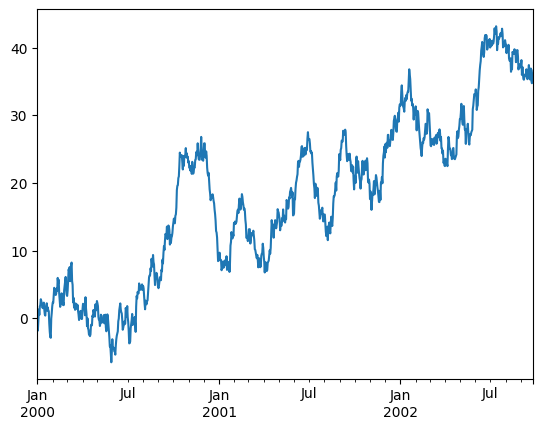

In [391]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

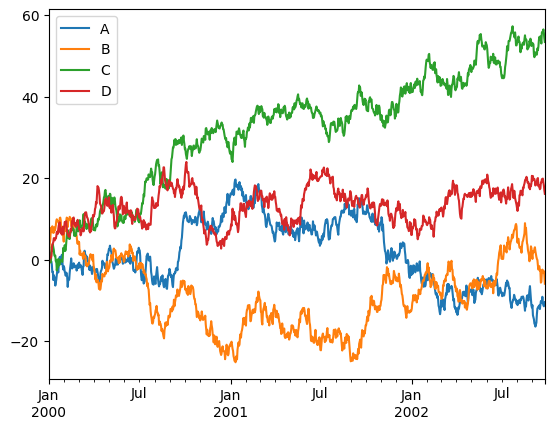

In [392]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

#### Сохранение и загрузка данных.

In [394]:
df.head()

,A,B,C,D
2000-01-01,0.878756,0.361658,1.357939,-0.826493
2000-01-02,1.963493,2.183524,1.332205,-0.234695
2000-01-03,1.350304,4.222648,1.279884,0.748565
2000-01-04,0.244153,5.081693,-0.431334,0.358791
2000-01-05,-0.422397,7.764549,-0.658814,0.524684


In [395]:
df

,A,B,C,D
2000-01-01,0.878756,0.361658,1.357939,-0.826493
2000-01-02,1.963493,2.183524,1.332205,-0.234695
2000-01-03,1.350304,4.222648,1.279884,0.748565
2000-01-04,0.244153,5.081693,-0.431334,0.358791
2000-01-05,-0.422397,7.764549,-0.658814,0.524684
...,...,...,...,...
2002-09-22,-10.640971,-2.611904,55.928308,19.921706
2002-09-23,-11.099332,-3.191248,56.517255,18.957996
2002-09-24,-11.396740,-2.771960,55.651036,18.266582
2002-09-25,-11.093499,-3.726270,54.326643,17.015695


Вот мы произвели некоторые вычисления с нашими данными. Теперь было бы неплохо их записать в файл, и отправить по почте, например. Для записи в файл используется функция `to_csv(filename)`. А для загрузки из файла используется функция `read_csv(filename)`.

In [397]:
df.to_csv('my_file.csv')

In [171]:
read_df = pd.read_('my_file.csv')

In [172]:
read_df.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.631802,0.550650,0.843491,-0.560408
1,2000-01-02,1.029232,0.341618,0.638285,0.119758
2,2000-01-03,0.475094,1.030297,0.724104,0.751242
3,2000-01-04,-0.112516,-0.140102,-0.626813,0.766096
4,2000-01-05,-0.882526,-0.057164,-2.113245,1.664130
